In [1]:
import sys
import json
from os import listdir
from itertools import product
import importlib
import matplotlib.pyplot as plt
import numpy as np

import input_output
importlib.reload(input_output)
import inheritance_states
importlib.reload(inheritance_states)
import transition_matrices
importlib.reload(transition_matrices)
import genotypes
importlib.reload(genotypes)
import losses
importlib.reload(losses)
import viterbi
importlib.reload(viterbi)

<module 'viterbi' from '/Users/kelley/Projects/PhasingFamilies/phase/viterbi.py'>

In [2]:
# Read in command line arguments
chrom = 'X'
ped_file = '../data/v34.vcf.ped'
#ped_file = '../data/Ancestry Data Files/AncestryDNA.ped'
#ped_file = '../data/spark.ped.quads.ped'
#ped_file = '../data/spark.ped'
#
#data_dir = '../split_gen_ancestry'
#param_file = '../parameter_estimation/params/ancestry_params_ext.json'
#data_dir = '../split_gen_spark'
#param_file = '../parameter_estimation/params/spark_params_ext.json'
#assembly = '38'
#detect_denovos = False

data_dir = '../split_gen_ihart'
param_file = '../parameter_estimation/params/ihart_multiloss_params.json'
num_loss_regions = 2
assembly = '37'
detect_deletions = True

#data_dir = '../split_gen_ihart_23andme'
#param_file = '../parameter_estimation/23andme_params.json'

#data_dir = '../split_gen_ihart_chip'
#param_file = '../parameter_estimation/ihart_chip_params.json'

batch_size = None
batch_num = None
batch_offset = None

# set up filenames
sample_file = '%s/chr.%s.gen.samples.txt' % (data_dir, chrom)
coord_file = '%s/chr.%s.gen.coordinates.npy' % (data_dir,  chrom)
gen_files = sorted([f for f in listdir(data_dir) if ('chr.%s.' % chrom) in f and 'gen.npz' in f])

if param_file is not None:
    with open(param_file, 'r') as f:
        params = json.load(f)
else:
    params = estimate_parameters.error_parameters(data_dir, ped_file, chrom)

In [3]:
# pull families of interest
families = input_output.pull_families(sample_file, ped_file)

families pulled 869


In [20]:
import random

family = random.choice(families)
#family = [f for f in families if f.id=='AU0197'][0]
print('family', family.id, family.individuals)

family AU0895 ['AU0895202', 'AU0895201', 'AU0895301', 'AU0895305', 'AU0895302']


In [21]:
# create genotypes
gens = genotypes.Genotypes(len(family))

genotypes (993, 5)


In [32]:
importlib.reload(inheritance_states)
importlib.reload(transition_matrices)
importlib.reload(losses)

# create inheritance states
if chrom == 'X':
    states = inheritance_states.InheritanceStates(family, detect_deletions, True, num_loss_regions)
else:
    states = inheritance_states.InheritanceStates(family, detect_deletions, detect_deletions, num_loss_regions)

# create transition matrix
transitions = transition_matrices.TransitionMatrix(states, params)
                
# create loss function
loss = losses.LazyLoss(states, gens, family, params, num_loss_regions)


inheritance states (512, 11)
transitions (512, 21)
AU0895202	0/0		0/1		1/1		./.
0/0	0.00-0.00	3.80-2.50	5.86-5.85	3.43-2.24
0/1	2.26-1.33	0.00-0.04	2.76-1.79	3.20-1.82
1/1	5.72-3.89	3.57-2.07	0.00-0.01	3.28-2.40
-/0	0.00-0.00	3.80-2.50	5.86-5.85	3.43-2.24
-/1	5.72-3.89	3.57-2.07	0.00-0.01	3.28-2.40
-/-	3.57-2.07	5.79-4.87	3.80-2.50	0.00-0.00
AU0895201	0/0		0/1		1/1		./.
0/0	0.00-0.00	3.80-2.50	5.74-5.37	3.48-2.27
0/1	2.26-1.33	0.00-0.04	2.86-1.75	3.13-1.76
1/1	5.75-3.90	3.57-2.07	0.00-0.01	3.47-2.47
-/0	0.00-0.00	3.80-2.50	5.74-5.37	3.48-2.27
-/1	5.75-3.90	3.57-2.07	0.00-0.01	3.47-2.47
-/-	3.57-2.07	5.75-4.63	3.80-2.50	0.00-0.00
AU0895301	0/0		0/1		1/1		./.
0/0	0.00-0.00	3.82-2.50	5.86-4.18	3.57-2.27
0/1	2.83-2.01	0.00-0.01	3.41-2.12	3.46-2.16
1/1	4.81-3.19	3.63-2.11	0.00-0.01	3.42-2.30
-/0	0.00-0.00	3.82-2.50	5.86-4.18	3.57-2.27
-/1	4.81-3.19	3.63-2.11	0.00-0.01	3.42-2.30
-/-	3.63-2.11	5.33-3.68	3.82-2.50	0.00-0.00
AU0895305	0/0		0/1		1/1		./.
0/0	0.00-0.00	3.73-2.48	5.90-4.21	3.52-2.

In [33]:
import input_output
importlib.reload(input_output)

# get ready to pull processed WGS data 
wgs_data = input_output.WGSData(data_dir, gen_files, coord_file, sample_file, ped_file, chrom, assembly)

chrom shape only SNPs (2853735,)


In [34]:
# pull genotype data for this family
family_genotypes, family_snp_positions, mult_factor = wgs_data.pull_data_for_individuals(family.individuals)
print('Data pulled')

all homref 0.9523431573008706
all homref or missing 0.9523431573008706
n 269204
[[        1     60215]
 [    60215     60216]
 [    60216     60336]
 ...
 [155255095 155259521]
 [155259521 155259522]
 [155259522 155270560]]
[[        1     60215]
 [    60215     60216]
 [    60216     60336]
 ...
 [155255095 155259521]
 [155259521 155259522]
 [155259522 155270560]]
[19  1 12 ... 34  1 10]
Data pulled


In [35]:
# forward sweep
v_cost = viterbi.viterbi_forward_sweep(family_genotypes, family_snp_positions, mult_factor, states, transitions, loss)




Forward sweep complete 38.480562925338745 sec


In [36]:
print(v_cost)

[[           inf 3.05716085e+01 1.00452362e+01 ... 3.54986417e+04
  3.55228371e+04 3.54995116e+04]
 [           inf 2.38382441e+01 9.91603397e+00 ... 3.54923661e+04
  3.55096975e+04 3.54932730e+04]
 [           inf 3.05716085e+01 1.00452362e+01 ... 3.54993225e+04
  3.55246678e+04 3.55031104e+04]
 ...
 [3.62356600e-01 4.29837052e-01 6.58694594e-01 ... 3.54823219e+04
  3.54845251e+04 3.54847158e+04]
 [1.95280001e-02 2.53428314e-02 3.76770468e-02 ... 3.54911954e+04
  3.54941901e+04 3.54942004e+04]
 [3.62356600e-01 4.29837052e-01 6.58694594e-01 ... 3.54862728e+04
  3.54883450e+04 3.54885357e+04]]


In [37]:
importlib.reload(viterbi)

# backward sweep
final_states = viterbi.viterbi_backward_sweep(v_cost, states, transitions)


Num solutions (1,) 35476.171607204225 (array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int8),)
(1,)
Num positions in fork 5268
Backward sweep complete 42.19959807395935 sec


In [38]:
print(final_states[:, 0])
print(final_states[:, 1])

print(final_states[:, -2])
print(final_states[:, -1])

[1 1 1 1 0 1 2 3 0 2 1 2 1 2 0]
[1 1 1 1 0 1 2 3 0 2 1 2 1 2 0]
[1 1 1 1 0 1 2 3 0 2 0 3 0 2 1]
[1 1 1 1 0 1 2 3 0 2 0 3 0 2 1]


In [39]:
print(np.sum(final_states[0, :]==0))
print(np.sum(final_states[1, :]==0))
print(np.sum(final_states[2, :]==0))
print(np.sum(final_states[3, :]==0))
print(np.sum(final_states[4, :]==0))
print(np.sum(final_states[5, :]==0))

152
49
239680
131
269204
0


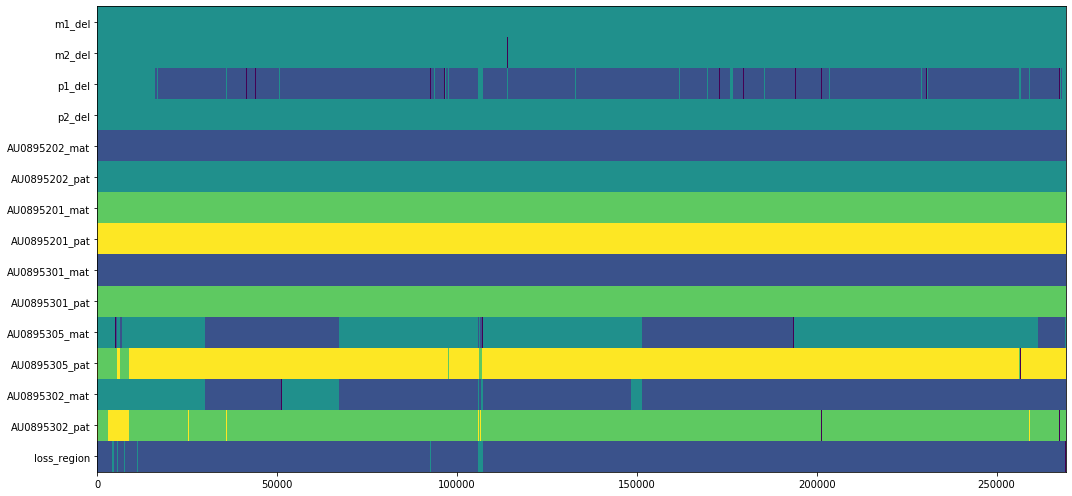

In [40]:
final_states_greyed = final_states.copy()
final_states_greyed[:, final_states[-1, :]!=0] = -1

plt.figure(figsize=(15, 7))
plt.imshow(final_states, aspect='auto', vmin=-1)
plt.yticks(np.arange(final_states.shape[0]), 
           ['m%d_del' % i for i in range(1, 2*len(family.mat_ancestors)+1)] + ['p%d_del' % i for i in range(1, 2*len(family.pat_ancestors)+1)] + \
           sum([['%s_mat' % x,'%s_pat' % x] for x in family.individuals], []) + ['loss_region'])

#plt.subplot(2, 1, 2, sharex=ax)
#plt.fill_between(np.arange(family_snp_positions.shape[0]), 0, (family_snp_positions[:, 0]>=0) & (family_snp_positions[:, 1]<=20500000), alpha=0.5)
#plt.fill_between(np.arange(family_snp_positions.shape[0]), 0, (family_snp_positions[:, 0]>=9600000) & (family_snp_positions[:, 1]<=16300000))
#plt.fill_between(np.arange(family_snp_positions.shape[0]), 0, (family_snp_positions[:, 1]<=9600000) | (family_snp_positions[:, 0]>=48200000))

#plt.xticks(xticks, xlabels, rotation=90)

#plt.subplot(3, 1, 3)
#plt.plot(np.log2(family_snp_positions[:, 1]-family_snp_positions[:, 0]), marker='.', linestyle='')
#plt.plot(c[1:]-c[:-1], marker='.', linestyle='')
#plt.plot(num_non_mend, marker='.', linestyle='')
#plt.plot(np.convolve(num_non_mend, np.ones((100,)), mode='same'))
#plt.plot(np.convolve(num_missing, np.ones((100,)), mode='same'))
#plt.scatter(family_snp_positions[:, 0], final_states[-1, :], marker='.')
#plt.xticks(family_snp_positions[xticks, 0], xlabels, rotation=90)
#for i in np.where(family_snp_positions[:, 1]-family_snp_positions[:, 0] > 10000)[0]:
#    plt.plot([family_snp_positions[i, 0], family_snp_positions[i, 1]], [final_states[-1, i], final_states[-1, i]], color='grey')
#    #print(family_snp_positions[i, :])
plt.tight_layout()
plt.show()

In [31]:
sample_id_to_sex = input_output.pull_sex(ped_file)

print([sample_id_to_sex[x] for x in family.individuals])


['2', '1', '1', '2', '1']


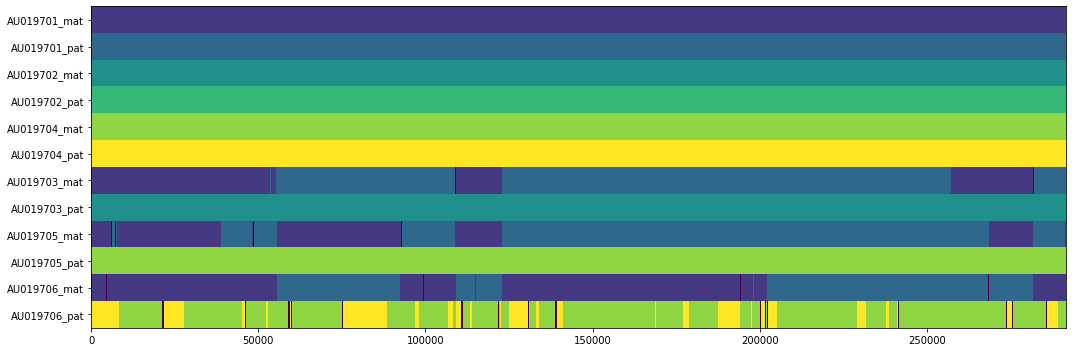

In [17]:
final_states_greyed = final_states.copy()
final_states_greyed[:, final_states[-1, :]!=0] = -1

plt.figure(figsize=(15, 5))
plt.imshow(final_states[2*family.num_ancestors():-1], aspect='auto', vmin=-1)
plt.yticks(np.arange(final_states.shape[0]-2*family.num_ancestors()-1), 
           sum([['%s_mat' % x,'%s_pat' % x] for x in family.individuals], []))

#plt.subplot(2, 1, 2, sharex=ax)
#plt.fill_between(np.arange(family_snp_positions.shape[0]), 0, (family_snp_positions[:, 0]>=0) & (family_snp_positions[:, 1]<=20500000), alpha=0.5)
#plt.fill_between(np.arange(family_snp_positions.shape[0]), 0, (family_snp_positions[:, 0]>=9600000) & (family_snp_positions[:, 1]<=16300000))
#plt.fill_between(np.arange(family_snp_positions.shape[0]), 0, (family_snp_positions[:, 1]<=9600000) | (family_snp_positions[:, 0]>=48200000))

#plt.xticks(xticks, xlabels, rotation=90)

#plt.subplot(3, 1, 3)
#plt.plot(np.log2(family_snp_positions[:, 1]-family_snp_positions[:, 0]), marker='.', linestyle='')
#plt.plot(c[1:]-c[:-1], marker='.', linestyle='')
#plt.plot(num_non_mend, marker='.', linestyle='')
#plt.plot(np.convolve(num_non_mend, np.ones((100,)), mode='same'))
#plt.plot(np.convolve(num_missing, np.ones((100,)), mode='same'))
#plt.scatter(family_snp_positions[:, 0], final_states[-1, :], marker='.')
#plt.xticks(family_snp_positions[xticks, 0], xlabels, rotation=90)
#for i in np.where(family_snp_positions[:, 1]-family_snp_positions[:, 0] > 10000)[0]:
#    plt.plot([family_snp_positions[i, 0], family_snp_positions[i, 1]], [final_states[-1, i], final_states[-1, i]], color='grey')
#    #print(family_snp_positions[i, :])
plt.tight_layout()
plt.show()

In [488]:
importlib.reload(input_output)

with open('../phased_ihart/chr.%s.%s.phased.txt' % (chrom, family.id), 'w+') as phasef:
    phasef.write('\t'.join(['family'] + \
                           ['m%d_del' % i for i in range(1, 2*len(family.mat_ancestors)+1)] + \
                           ['p%d_del' % i for i in range(1, 2*len(family.pat_ancestors)+1)] + \
                           sum([['%s_mat' % x, '%s_pat' % x] for x in family.individuals], []) + \
                           ['loss_region', 'start_pos', 'end_pos']) + '\n')
    input_output.write_to_file(sys.stdout, phasef, family, final_states, family_snp_positions)




AU0197	AU019701	AU019702	AU019704	AU019703	AU019706	AU019705
Write to file complete


In [418]:
is_hts = final_states[-1, :]==1
has_m1_deletion = final_states[0, :]==0
has_m2_deletion = final_states[1, :]==0
has_p1_deletion = final_states[2, :]==0
has_p2_deletion = final_states[3, :]==0

preferred_phase_options = [[0, -1], [1, -1], [2, -1], [3, -1], [0, -1], [2, -1]] + [[0, 1, -1], [2, 3, -1]]*(m-3)

has_upd = np.zeros((2*m, final_states.shape[1]), dtype=bool)
for i in range(m):
    has_upd[2*i, :] = ~np.isin(final_states[4+2*i, :], preferred_phase_options[2*i])
    has_upd[2*i + 1, :] = ~np.isin(final_states[5+2*i, :], preferred_phase_options[2*i + 1])

print('hard to sequence', np.sum(mult_factor * is_hts)/np.sum(mult_factor))     

print('m1 deletion', np.sum(mult_factor * (has_m1_deletion & ~is_hts)))
print('m2 deletion', np.sum(mult_factor * (has_m2_deletion & ~is_hts)))
print('p1 deletion', np.sum(mult_factor * (has_p1_deletion & ~is_hts)))
print('p2 deletion', np.sum(mult_factor * (has_p2_deletion & ~is_hts)))

# maternal UPD
print('maternal UPD', np.sum(mult_factor * ((has_upd[0, :] | has_upd[1, :]) & ~is_hts)))
print('paternal UPD', np.sum(mult_factor * ((has_upd[2, :] | has_upd[3, :]) & ~is_hts)))

for i in range(m-2):
    print('child%d mat upd' % (i+1), np.sum(mult_factor * (has_upd[4+2*i, :] & ~is_hts)))
    print('child%d pat upd' % (i+1), np.sum(mult_factor * (has_upd[5+2*i, :] & ~is_hts)))


hard to sequence 0.016453760486423802
m1 deletion 165
m2 deletion 506
p1 deletion 336
p2 deletion 231
maternal UPD 1505748
paternal UPD 1506305
child1 mat upd 1506305
child1 pat upd 1506305
child2 mat upd 1506305
child2 pat upd 1506305
child3 mat upd 0
child3 pat upd 0
child4 mat upd 0
child4 pat upd 1506305


In [419]:
#event = has_p1_deletion & ~is_hts
event = has_upd[6, :]
del_start = np.where(~event[:-1] & event[1:])[0]+1
del_end = np.where(event[:-1] & ~event[1:])[0]+1

print(len(del_start), len(del_end))
print(del_start, del_end)

# remove events in hard to sequence regions
event_is_hts = np.ones((del_start.shape[0],), dtype=bool)
for i, (s, e) in enumerate(zip(del_start, del_end)):
    event_is_hts[i] = np.any(is_hts[s:e])
print('hard to seq', event_is_hts)
    
#del_start = np.array(del_start)[~event_is_hts]
#del_end = np.array(del_end)[~event_is_hts]
#print(len(del_start), len(del_end))

print(del_start, del_end)

0 0
[] []
hard to seq []
[] []


In [420]:
dstart, dend = random.choice(list(zip(del_start, del_end)))
start, end = max(0, dstart-100), min(dend+100, family_genotypes.shape[1])

print(final_states[:, start])
#print(dstart, dend)
#print(family_snp_positions[dstart, :], family_snp_positions[dend, :])
#start, end = 168156000, 168172000
#start, end = 71706745, 71715561
#start, end = 225044, 225185

#start, end = 3711060, 3711393
#start, end = np.where(family_snp_positions[:, 0]>=start)[0][0], np.where(family_snp_positions[:, 0]<=end)[0][-1]
#start, end = max(0, start-100), min(end+100, family_genotypes.shape[1])

state_indices_of_interest = []

plt.figure(figsize=(15, 10))
ax = plt.subplot(4, 1, 1)
plt.plot(mult_factor[start:end])

plt.subplot(4, 1, 2, sharex=ax)
plt.imshow(family_genotypes[:, start:end], aspect='auto', vmin=-3, vmax=2)
plt.yticks(np.arange(m), ['mom', 'dad'] + ['child %d' % i for i in range(1, m-1)])

plt.subplot(4, 1, 3, sharex=ax)
plt.imshow(final_states[[0, 1, 2, 3] + \
                               [4, 5] + np.arange(8, 4+(2*m), 2).tolist() + \
                               [6, 7] + np.arange(9, 4+(2*m), 2).tolist() + [-1], start:end],
           aspect='auto', vmin=-1, vmax=3)
plt.yticks(np.arange(final_states.shape[0]), 
           ['m1 del', 'm2 del', 'p1 del', 'p2 del', 'm1', 'm2'] + ['child_%d mat' % i for i in range(1, m-1)] + ['p1', 'p2'] + ['child_%d pat' % i for i in range(1, m-1)] + ['is_hts'])

#plt.subplot(4, 1, 4, sharex=ax)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index(tuple(np.clip(final_states[:, j], 0, None)))] for j in range(start, end)], alpha=0.5)

#plt.subplot(5, 1, 5, sharex=ax)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index(tuple(np.clip(final_states[:, j], 0, None)))] for j in range(start, end)], alpha=0.5)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index(tuple(np.hstack((np.clip(final_states[:2*m, j], 0, None), [0,]*(2*(m-2)), [np.clip(final_states[-1, j], 0, None)]))))] for j in range(start, end)], alpha=0.5)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index(tuple(np.hstack(([1,]*4, np.clip(final_states[4:, j], 0, None)))))] for j in range(start, end)], alpha=0.5)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index((1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0))] for j in range(start, end)], alpha=0.5)
#plt.plot(np.cumsum([loss(tuple(family_genotypes[:, j]))[states.index((1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0))] for j in range(start, end)]), alpha=0.5)
#plt.plot(np.cumsum([loss(tuple(family_genotypes[:, j]))[states.index((1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0))] for j in range(start, end)]), alpha=0.5)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index((1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0))] for j in range(start, end+1)], alpha=0.5)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index((0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0))] for j in range(start, end+1)], alpha=0.5)



plt.tight_layout()
plt.show()

IndexError: Cannot choose from an empty sequence

In [ ]:
plt.figure(figsize=(15, 3))
plt.imshow(family_genotypes[:, start:end], aspect='auto', vmin=-3, vmax=2)
plt.show()

In [ ]:
markers = []
labels = []
with open('../data/cytoBand.txt', 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        if pieces[0][3:] == chrom:
            markers.append(int(pieces[1]))
            labels.append(chrom + pieces[3])

plt.figure(figsize=(15, 3))
x = sum([[s-1, s, e, e+1] for s, e in zip(family_snp_positions[del_start, 0], family_snp_positions[del_end, 1])], [])
y = sum([[0, 1, 1, 0] for s, e in zip(del_start, del_end)], [])
plt.plot(x, y)
plt.xticks([x for x in markers if x>= plt.xlim()[0] and x<=plt.xlim()[1]], 
           [l for x, l in zip(markers, labels) if x>= plt.xlim()[0] and x<=plt.xlim()[1]], rotation=90)
plt.show()

In [ ]:
print(inds)

In [ ]:
plt.figure(figsize=(15, 10))

ax = plt.subplot(m, 1, 1)

for i in range(4):
    #plt.scatter(family_snp_positions[final_states_greyed[i, :] == -1, 0], np.repeat(3-i, np.sum(final_states_greyed[i, :] == -1)), color='blue', alpha=0.5)
    plt.scatter(family_snp_positions[final_states_greyed[i, :] == 0, 0], np.repeat(3-i, np.sum(final_states_greyed[i, :] == 0)), color='red', alpha=0.5)
plt.title('Deletions')
plt.yticks(range(3, -1, -1), ['m1', 'm2', 'p1', 'p2'])

for i in range(0, m-2):
    plt.subplot(m, 1, i+2, sharex=ax)
    indices = (final_states_greyed[4+(2*i), :] == 0) & (final_states_greyed[-1, :] == 0)
    plt.scatter(family_snp_positions[indices, 0], np.repeat(0, np.sum(indices)), color='blue', alpha=0.5)
    indices = (final_states_greyed[4+(2*i), :] == 1) & (final_states_greyed[-1, :] == 0)
    plt.scatter(family_snp_positions[indices, 0], np.repeat(0, np.sum(indices)), color='red', alpha=0.5)

    indices = (final_states_greyed[5+(2*i), :] == 0) & (final_states_greyed[-1, :] == 0)
    plt.scatter(family_snp_positions[indices, 0], np.repeat(1, np.sum(indices)), color='blue', alpha=0.5)
    indices = (final_states_greyed[5+(2*i), :] == 1) & (final_states_greyed[-1, :] == 0)
    plt.scatter(family_snp_positions[indices, 0], np.repeat(1, np.sum(indices)), color='red', alpha=0.5)

    plt.title('Child%d' % (i+1))
    plt.yticks(range(0, 2), ['mat', 'pat'])

plt.subplot(m, 1, m, sharex=ax)
plt.scatter(family_snp_positions[final_states_greyed[-1, :] == -1, 0], np.repeat(0, np.sum(final_states_greyed[-1, :] == -1)), color='blue', alpha=0.5)
plt.scatter(family_snp_positions[final_states_greyed[-1, :] == 1, 0], np.repeat(0, np.sum(final_states_greyed[-1, :] == 1)), color='red', alpha=0.5)
plt.title('Hard to sequence')

plt.tight_layout()
plt.show()



In [ ]:
print(family_snp_positions[start, :], family_snp_positions[end, :])

In [ ]:
import numpy as np
def estimate_parental_variants(final_states, family_genotypes):
    m, n = family_genotypes.shape
    parental_variants, cost, blame = -np.ones((4, n), dtype=np.int8), -np.ones((n,), dtype=int), -np.ones((m, n), dtype=float)
    has_missing = 0
    for i in range(n):
        state, gen = final_states[:, i], tuple(family_genotypes[:, i])
        
        missing_indices = [i for i, x in enumerate(state) if x==-1]
        
        if len(missing_indices) == 0:
            pv, v, b = loss.get_parental_variants(tuple(state), gen)
            parental_variants[:, i] = pv
            cost[i] = v
            blame[:, i] = b
        else:
            has_missing += 1
            all_possible_states = np.tile(state, (pow(2, len(missing_indices)), 1))
            all_possible_states[:, missing_indices] = list(product(*[[0, 1]]*len(missing_indices)))

            min_v = None
            all_pvs, all_bs = [], []
            for s in all_possible_states:
                pv, v, b = loss.get_parental_variants(tuple(s), gen)
                if min_v is None or v < min_v:
                    min_v = v
                    all_pvs, all_bs = [pv], [b]
                elif v == min_v:
                    all_pvs.append(pv)
                    all_bs.append(b)

            all_pvs, all_bs = np.asarray(all_pvs), np.asarray(all_bs)
            parental_variants[np.all(all_pvs==-2, axis=0), i] = -2
            parental_variants[np.all(all_pvs==0, axis=0), i] = 0
            parental_variants[np.all(all_pvs==1, axis=0), i] = 1
            cost[i] = min_v
            
            all_bs = np.sum(all_bs, axis=0)
            if min_v == 0:
                blame[:, i] = 0
            else:
                blame[:, i] = min_v*all_bs/np.sum(all_bs)
            
        if i%10000==0:
            print(i, has_missing)
    return parental_variants, cost, blame

parental_variants, cost, blame = estimate_parental_variants(states, family_genotypes)       

In [ ]:
import time
import numpy as np
from itertools import product

def mask_states(family_genotypes, mult_factor, final_states, inheritance_states, loss, error_rate=0.001, smooth=5000):

	masked_final_states = np.copy(final_states)
	# Now, do masking
	prev_time = time.time()
	m, n = family_genotypes.shape
	p, state_len = inheritance_states.p, inheritance_states.state_len

	fit = -np.ones((n,), dtype=int)
	prev_state = None
	prev_state_indices = None
	for j in range(n): 
		pos_gen = tuple(family_genotypes[:, j])
		current_state = tuple(final_states[:, j])

		if current_state != prev_state:
			prev_state = current_state
			num_unknowns = len([x for x in current_state if x == -1])
			if num_unknowns>0:
				prev_state_indices = []
				for poss_itr in [iter(x) for x in product(*([[0, 1]]*num_unknowns))]:
					poss_state = tuple([x if x != -1 else next(poss_itr) for x in current_state])
					prev_state_indices.append(inheritance_states.index(poss_state))
			else:
				prev_state_indices = [inheritance_states.index(tuple(final_states[:, j]))]

		fit[j] = mult_factor[j]*(np.min(loss(pos_gen)[prev_state_indices])==1)
        
	print(np.unique(fit, return_counts=True))


	c = np.convolve(fit/m, np.ones(smooth,), mode='same')
	masked = (c>(error_rate*smooth)).astype(np.int8)
	print('Percent masked', 100*np.sum(masked)/n)

	# if a parental chromosome isn't inherited, then we don't know if it has a deletion
	maternal_indices = range(4, state_len, 2)
	paternal_indices = range(5, state_len, 2)

	m1_ninh = np.all(final_states[maternal_indices, :]!=0, axis=0)
	m2_ninh = np.all(final_states[maternal_indices, :]!=1, axis=0)
	p1_ninh = np.all(final_states[paternal_indices, :]!=0, axis=0)
	p2_ninh = np.all(final_states[paternal_indices, :]!=1, axis=0)

	masked_final_states[0, m1_ninh] = -1
	masked_final_states[1, m2_ninh] = -1
	masked_final_states[2, p1_ninh] = -1
	masked_final_states[3, p2_ninh] = -1
	masked_final_states = np.append(masked_final_states, masked[np.newaxis, :], axis=0)
	print('Percent never inherited', 100*np.sum(m1_ninh)/n, 100*np.sum(m2_ninh)/n, 100*np.sum(p1_ninh)/n, 100*np.sum(p2_ninh)/n)

	print('Masking complete', time.time()-prev_time, 'sec') 
	return masked_final_states, c

In [ ]:
# mask messy areas
masked_final_states, f = mask_states(family_genotypes, mult_factor, final_states, inheritance_states, loss, error_rate=0.01)
#masked_final_states[:, masked_final_states[-1, :]==1] = -1

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(f/1000)
plt.plot(overall)
plt.show()

In [ ]:
smooth=5000
c = np.convolve(np.sum(parental_variants==-2, axis=0), np.ones(smooth,), mode='same')/(smooth*m)
d = np.convolve(np.sum(parental_variants==-1, axis=0), np.ones(smooth,), mode='same')/(smooth*m)

plt.figure(figsize=(15, 5))
plt.plot(a, label='deletion')
plt.plot(b, label='unknown')
plt.plot(c, label='deletion')
plt.plot(d, label='unknown')
#plt.plot(overall)
#plt.ylim([0, 0.1])
plt.axhline(0.01)
plt.legend()
plt.show()

In [ ]:
print(np.sum(parental_variants==-1)/(4*parental_variants.shape[1]))

In [ ]:
print(np.sum(blame==0)/(blame.shape[0]*blame.shape[1]))
print(np.sum(parental_variants==0)/(parental_variants.shape[0]*parental_variants.shape[1]))


In [ ]:
pos_lens = family_snp_positions[:, 1]-family_snp_positions[:, 0]
print(pos_lens.shape)
print(np.sum(parental_variants!=0))
print(np.sum(mult_factor*np.sum(parental_variants!=0, axis=0)))
print(np.sum(mult_factor[np.any(parental_variants!=0, axis=0)]))

In [ ]:
import scipy.sparse as sparse

chrom_length = chrom_lengths[chrom]
nonzeros = np.sum(mult_factor*np.sum(parental_variants!=0, axis=0))
data = np.zeros((nonzeros,), dtype=np.int8)
row_ind = np.zeros((nonzeros,), dtype=int)
col_ind = np.zeros((nonzeros,), dtype=int)

data_index = 0
for i, j in zip(*np.nonzero(parental_variants)):
    pos_start, pos_end = family_snp_positions[j, :]
    pos_length = pos_end - pos_start
    
    data[data_index:(data_index+pos_length)] = parental_variants[i, j]
    row_ind[data_index:(data_index+pos_length)] = i
    col_ind[data_index:(data_index+pos_length)] = range(pos_start, pos_end)
    data_index += pos_length

parental_variants_csc = sparse.csc_matrix((data, (row_ind, col_ind)), shape=(4, chrom_length))

In [ ]:
print(np.nonzero(parental_variants)[0].shape)
print(data[:5])
print(parental_variants_csc.nnz)

In [ ]:
import random
j = random.choice(np.where(mult_factor*np.any(parental_variants!=0, axis=0)>1)[0])
print(j, family_snp_positions[j, :])
print(parental_variants[:, j])
print(parental_variants_csc[:, family_snp_positions[j, 0]:family_snp_positions[j, 1]])

In [ ]:
plt.figure(figsize=(15, 5))
plt.imshow((parental_variants==-1)[:1000], aspect='auto')
plt.show()

In [ ]:
smooth=5000
mo = np.convolve(blame[0, :], np.ones(smooth,), mode='same')/smooth
d = np.convolve(blame[1, :], np.ones(smooth,), mode='same')/smooth
c1 = np.convolve(blame[2, :], np.ones(smooth,), mode='same')/smooth
c2 = np.convolve(blame[3, :], np.ones(smooth,), mode='same')/smooth
c3 = np.convolve(blame[4, :], np.ones(smooth,), mode='same')/smooth
overall = np.convolve(np.sum(blame, axis=0), np.ones(smooth,), mode='same')/smooth

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

ax1 = plt.subplot(2, 1, 1)
plt.plot(mo, label='mom')
plt.plot(d, label='dad')
plt.plot(c1, label='child1')
plt.plot(c2, label='child2')
plt.plot(c3, label='child3')
plt.plot(overall, label='overall', color='black')
plt.axhline(0.01, color='black')
plt.legend()
plt.ylim([0, 0.1])

all_convolve = np.vstack((mo, d, c1, c2, c3))

plt.subplot(2, 1, 2, sharex=ax1)
plt.imshow(np.vstack((masked_final_states[-1, :], np.sum(all_convolve>0.01, axis=0)>1)), aspect='auto')

plt.show()

In [ ]:

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(3, 1, 1)
plt.plot(mo, label='mom')
plt.plot(d, label='dad')
plt.plot(c1, label='child1')
plt.plot(c2, label='child2')
plt.plot(c3, label='child3')
#plt.plot(b)
plt.legend()

plt.subplot(3, 1, 2, sharex=ax1)
plt.imshow(final_states, aspect='auto')

plt.subplot(3, 1, 3, sharex=ax1)
plt.imshow(masked_final_states, aspect='auto')

plt.show()

In [ ]:
smooth=5000
mo = np.convolve(blame[0, :], np.ones(smooth,), mode='same')/smooth
d = np.convolve(blame[1, :], np.ones(smooth,), mode='same')/smooth
c1 = np.convolve(blame[2, :], np.ones(smooth,), mode='same')/smooth
c2 = np.convolve(blame[3, :], np.ones(smooth,), mode='same')/smooth
c3 = np.convolve(blame[4, :], np.ones(smooth,), mode='same')/smooth
overall = np.convolve(np.sum(blame, axis=0), np.ones(smooth,), mode='same')/smooth

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(3, 1, 1)
plt.plot(mo, label='mom')
plt.plot(d, label='dad')
plt.plot(c1, label='child1')
plt.plot(c2, label='child2')
plt.plot(c3, label='child3')
#plt.plot(b)
plt.legend()

plt.subplot(3, 1, 2, sharex=ax1)
plt.imshow(final_states, aspect='auto')

plt.subplot(3, 1, 3, sharex=ax1)
plt.imshow(masked_final_states, aspect='auto')

plt.show()

In [ ]:
m = 5
smooth = 5000

In [ ]:
# family-wise unphased mendelian
unique_gens, indices = np.unique(family_genotypes, axis=1, return_inverse=True)

parents_to_children_with_del = {
    (-1, -1): [-1],
    (-1, 0): [-1, 0],
    (-1, 1): [0, 2],
    (-1, 2): [-1, 2],
    (0, 0): [-1, 0],
    (0, 1): [0, 1, 2],
    (0, 2): [-1, 0, 1, 2],
    (1, 1): [0, 1, 2],
    (1, 2): [0, 1, 2],
    (2, 2): [-1, 2]
    
}

parents_to_children_without_del = {
    (0, 0): [0],
    (0, 1): [0, 1],
    (0, 2): [1],
    (1, 1): [0, 1, 2],
    (1, 2): [1, 2],
    (2, 2): [2]
    
}
parental_genotypes = list(product(*[[0, 1, 2]]*2))

# without del
trio_perfect_match_gens_nodel = set()
trios_could_be_mendelian = np.zeros((family_genotypes.shape[1],), dtype=int)
for pg in parental_genotypes:
    trio_perfect_match_gens_nodel.update([pg + cg for cg in product(*[parents_to_children_without_del[(min(pg), max(pg))]]*(m-2))])

for i, gen in enumerate(unique_gens.T):
    missing_indices = [i for i, x in enumerate(gen) if x==-1]
    all_possible_gens = np.tile(gen, (pow(4, len(missing_indices)), 1))
    all_possible_gens[:, missing_indices] = list(product(*[[-1, 0, 1, 2]]*len(missing_indices)))
    #print(all_possible_gens)
    
    if np.any([tuple(g) in trio_perfect_match_gens_nodel for g in all_possible_gens]):
        trios_could_be_mendelian[indices==i] = 1



In [ ]:
print(len(trio_perfect_match_gens_del), len(trio_perfect_match_gens_nodel))

In [ ]:
smooth = 500*4
smoothed_cost = np.convolve(cost>0, np.ones(smooth,), mode='same')/smooth
smoothed_md_nodel = np.convolve(1-trios_could_be_mendelian, np.ones(smooth,), mode='same')/smooth
smoothed_final = np.convolve((cost>0) - 1 + trios_could_be_mendelian, np.ones(smooth,), mode='same')/smooth

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 1, 1)
plt.plot(smoothed_md_nodel, label='unphased mendelian no del', alpha=0.5)
plt.plot(smoothed_cost, label='phased family mendelian', alpha=0.5)
plt.plot(smoothed_cost-smoothed_md_nodel)
plt.plot(smoothed_final)

#plt.plot(mo, label='mom')
#plt.plot(d, label='dad')
#plt.plot(c1, label='child1')
#plt.plot(c2, label='child2')
#plt.plot(c3, label='child3')
plt.axhline(0.01)
plt.legend()

to_plot = []
for smooth in [1, 50, 100, 500, 1000, 5000]:
    smooth = smooth*4
    smoothed_cost = np.convolve(cost>0, np.ones(smooth,), mode='same')/smooth
    smoothed_md_nodel = np.convolve(1-trios_could_be_mendelian, np.ones(smooth,), mode='same')/smooth
    to_plot.append(smoothed_cost-smoothed_md_nodel>0.01)


plt.subplot(2, 1, 2, sharex=ax1)
plt.imshow(np.vstack((final_states, to_plot[0], to_plot[1], to_plot[2], to_plot[3], to_plot[4], to_plot[5])), aspect='auto')

plt.show()

In [ ]:
print(np.sum(1-trios_could_be_mendelian)/2/trios_could_be_mendelian.shape)
print(np.sum(cost>0)/2/cost.shape)
print((np.sum(parental_variants[:, cost==0]==-1) + m*np.sum(cost!=0))/2/(m*cost.shape[0]))

In [ ]:
print(np.sum(smoothed_md_del > 0.01)/smoothed_md_del.shape)

plt.figure(figsize=(15, 5))
plt.hist(smoothed_md_del, bins=70)
plt.xlim([0, 0.1])
plt.show()

In [ ]:

smooth=5000
#mo = np.convolve(blame[0, :], np.ones(smooth,), mode='same')/smooth
#d = np.convolve(blame[1, :], np.ones(smooth,), mode='same')/smooth
#c1 = np.convolve(blame[2, :], np.ones(smooth,), mode='same')/smooth
#c2 = np.convolve(blame[3, :], np.ones(smooth,), mode='same')/smooth
#c3 = np.convolve(blame[4, :], np.ones(smooth,), mode='same')/smooth
#overall = np.convolve(np.sum(blame, axis=0), np.ones(smooth,), mode='same')/smooth



plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 1, 1)
plt.plot(mo, label='mom')
plt.plot(d, label='dad')
plt.plot(c1, label='child1')
plt.plot(c2, label='child2')
plt.plot(c3, label='child3')
#plt.plot(b)
plt.legend()

plt.subplot(2, 1, 2, sharex=ax1)
plt.imshow(final_states, aspect='auto')

plt.show()

In [ ]:
print(np.sum(blame[0, :]==1), np.sum(blame[1, :]==1))
print(np.sum(blame[2, :]==1), np.sum(blame[3, :]==1), np.sum(blame[4, :]==1))

In [ ]:
print('hello')

In [ ]:
smooth=500
mo = np.convolve(blame[0, :], np.ones(smooth,), mode='same')/smooth
d = np.convolve(blame[1, :], np.ones(smooth,), mode='same')/smooth
c1 = np.convolve(blame[2, :], np.ones(smooth,), mode='same')/smooth
c2 = np.convolve(blame[3, :], np.ones(smooth,), mode='same')/smooth
c3 = np.convolve(blame[4, :], np.ones(smooth,), mode='same')/smooth


plt.figure(figsize=(15, 5))

plt.plot(mo, label='mom')
plt.plot(d, label='dad')
plt.plot(c1, label='child1')
plt.plot(c2, label='child2')
plt.plot(c3, label='child3')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
plt.imshow(final_states, aspect='auto')
plt.show()
print(np.sum(np.any(final_states[:, 1:] != final_states[:, :-1], axis=0)))

In [ ]:
plt.figure(figsize=(15, 5))
plt.imshow(masked_final_states, aspect='auto')
plt.show()
print(np.sum(np.any(masked_final_states[4:, 1:] != masked_final_states[4:, :-1], axis=0)))

In [ ]:
plt.figure(figsize=(15, 5))
plt.imshow(family_genotypes[:50000, :], aspect='auto')
plt.show()


In [ ]:
plt.figure(figsize=(15, 5))
plt.imshow(final_states, aspect='auto')
plt.show()


In [ ]:
import numpy as np
print(np.sum((family_genotypes[2, :]==1) & (family_genotypes[[0, 1, 3], :]==0)))
print(np.sum((family_genotypes[3, :]==1) & (family_genotypes[[0, 1, 2], :]==0)))

In [ ]:
print(wgs_data.chrom_length)

In [ ]:
93326/family_genotypes.shape[1]

In [ ]:
print(np.sum((family_genotypes[2, :]==1) & np.all(family_genotypes[[0, 1, 3], :]==0, axis=0))/family_genotypes.shape[1])
print(np.sum((family_genotypes[3, :]==1) & np.all(family_genotypes[[0, 1, 2], :]==0, axis=0))/family_genotypes.shape[1])

In [ ]:
print(np.sum(np.all(family_genotypes==0, axis=0))/family_genotypes.shape[1])